In [6]:
import pandas as pd
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [2]:
ht = pd.read_csv('felizviernes.txt')

### Creation date

In [14]:
ht

,id tweet,date,text,lang,app,author,id author,name,description,location,created at,author url,description urls,profile image url,followers,following,tweets,relation,user retweeted,tweet hashtags,tweet urls,media keys,id tweet retweeted,media types,media urls,retrieved at,date_calc
0,1598726238390067201,2022-12-02 17:10:12,RT @marcvidal: Le prohibieron utilizar una laptop en clase... #felizviernes https://t.co/t1v91RM4cs,es,Twitter for iPhone,Quim_Twin84,996901046130823168,Quim,"Ciencia, Trading y Bolsa, Lectura, Gym, Gaming...","Granada, España",2018-05-16 23:51:45,None,None,https://pbs.twimg.com/profile_images/996903358245015553/rU64SD_1_normal.jpg,63,240,6304,retweeted,marcvidal,['felizviernes'],['https://twitter.com/marcvidal/status/1598648298683961349/video/1'],['7_1598647093077352448'],1.598648e+18,['video'],['https://pbs.twimg.com/ext_tw_video_thumb/1598647093077352448/pu/img/JDLtrKdfszjA97UJ.jpg'],2022-12-02 17:10:27,2018-05
1,1598726217544318982,2022-12-02 17:10:07,"RT @andreitav92: Muy buenos días!!!☀️ ☕️ ~ Suelta lo que pesa, ama lo que tienes y agradece lo que llega~ #FelizViernes https://t.co/edDHKl6Www",es,Twitter for Android,vissaeusmorenae,1222738770769993728,Ssamtao Corazón Agnostico y Hereje 🖤,Factor de disertación,None,2020-01-30 04:30:24,None,None,https://pbs.twimg.com/profile_images/1266213971213914112/ez3d5omr_normal.jpg,18293,7971,402378,retweeted,andreitav92,['FelizViernes'],['https://twitter.com/andreitav92/status/1598688083469369344/photo/1'],['3_1598688062757916674'],1.598688e+18,['photo'],['https://pbs.twimg.com/media/Fi-uUqdX0AITlGv.jpg'],2022-12-02 17:10:27,2020-01
2,1598726191627657216,2022-12-02 17:10:01,RT @galaornella: 🎅🏻🎄 ᙏ̤̫ ˳⛄🥛✧༚🎅🏻🎄 ᙏ̤̫ ˳⛄ Buenos 🅳🅸🅰🆂♥️♥️ Amig@s💓💓 #BuenosDiasATodos🌲🎀🌲 #FelizViernes Para Todos ♥️ 🌲🎅🎀🌲 🎅🏻🎄 ᙏ̤̫ ˳⛄🥛✧༚🎅🏻🎄 ᙏ̤̫ ˳⛄ https://t.co/cmwErLr3Cc,eu,Twitter for Android,CristalUrsula,1323356991004332039,*＊✿❀ 💎CRISTAL 💎❀✿＊*,🇦🇷💓🇦🇷💓🇦🇷🌈El Amor No es Una Emoción ..Es Tu Propia Existencia ..🙇 ⛔BLOQUEO PORNOGRAFÍA 🚨 NO CANDADO ⛔NO DM🚨⛔,Argentina🇦🇷♥️🇦🇷,2020-11-02 20:11:35,None,None,https://pbs.twimg.com/profile_images/1531085737843564545/gkyxEjby_normal.jpg,2292,1881,10803,retweeted,galaornella,"['BuenosDiasATodos', 'FelizViernes']",['https://twitter.com/galaornella/status/1598658077787820032/photo/1'],['3_1598658074625146883'],1.598658e+18,['photo'],['https://pbs.twimg.com/media/Fi-TDH9XgAMdF-K.jpg'],2022-12-02 17:10:27,2020-11
3,1598726190096945167,2022-12-02 17:10:01,RT @marcvidal: Le prohibieron utilizar una laptop en clase... #felizviernes https://t.co/t1v91RM4cs,es,Twitter for Android,PSR8686,300791518,Pablo Sainz,"👨‍👧 Pues nada, ya estaría!","Principado de Asturias, España",2011-05-18 11:10:15,None,None,https://pbs.twimg.com/profile_images/1264293289156640776/2YW9ffCg_normal.jpg,271,573,11289,retweeted,marcvidal,['felizviernes'],['https://twitter.com/marcvidal/status/1598648298683961349/video/1'],['7_1598647093077352448'],1.598648e+18,['video'],['https://pbs.twimg.com/ext_tw_video_thumb/1598647093077352448/pu/img/JDLtrKdfszjA97UJ.jpg'],2022-12-02 17:10:27,2011-05
4,1598726185826992129,2022-12-02 17:10:00,"#HoyEnLaHistoria #FelizViernes -1981 - Nace en McComb, Mississippi, EE. UU, la cantante, actriz, bailarina @BritneySpears. Cumple 41 años. @rochy62 https://t.co/KR2jXBvXKE",es,TweetDeck,ManoloBellon,168303922,manolobellon,"Desde 1969 - ¡53 años de buena radio, buena música! Disc-jockey / periodista / autor rock/pop. Disc-jockey / journalist /author. 53 years on air. Podcaster",Colombia,2010-07-19 00:17:44,['https://t.co/pyJs0sR8lC'],None,https://pbs.twimg.com/profile_images/1271195958836166656/YIx9jRT0_normal.jpg,39394,1281,83644,tweet,None,"['HoyEnLaHistoria', 'FelizViernes']",['https://twitter.com/ManoloBellon/status/1598726185826992129/photo/1'],['3_1596312224762667011'],NaN,['photo'],['https://pbs.twimg.com/media/Fic9gsOXoAMn7w5.jpg'],2022-12-02 17:10:27,2010-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [15]:
ht['date_calc'] = ht['created at'].apply(lambda x:str(x))
ht['date_calc'] = ht['date_calc'].apply(lambda x: x.split(" ")[0][:-3])

In [16]:
created_by_days = ht['date_calc'].value_counts()

In [17]:
created_by_days = created_by_days.reset_index()

In [18]:
created_by_days.columns = ['month','count']
created_by_days = created_by_days.sort_values(by='month')

In [19]:
created_by_days

,month,count
181,2007-04,1
183,2007-05,1
180,2007-08,1
177,2007-10,2
174,2007-11,3
...,...,...
3,2022-08,221
1,2022-09,295
2,2022-10,260
0,2022-11,610


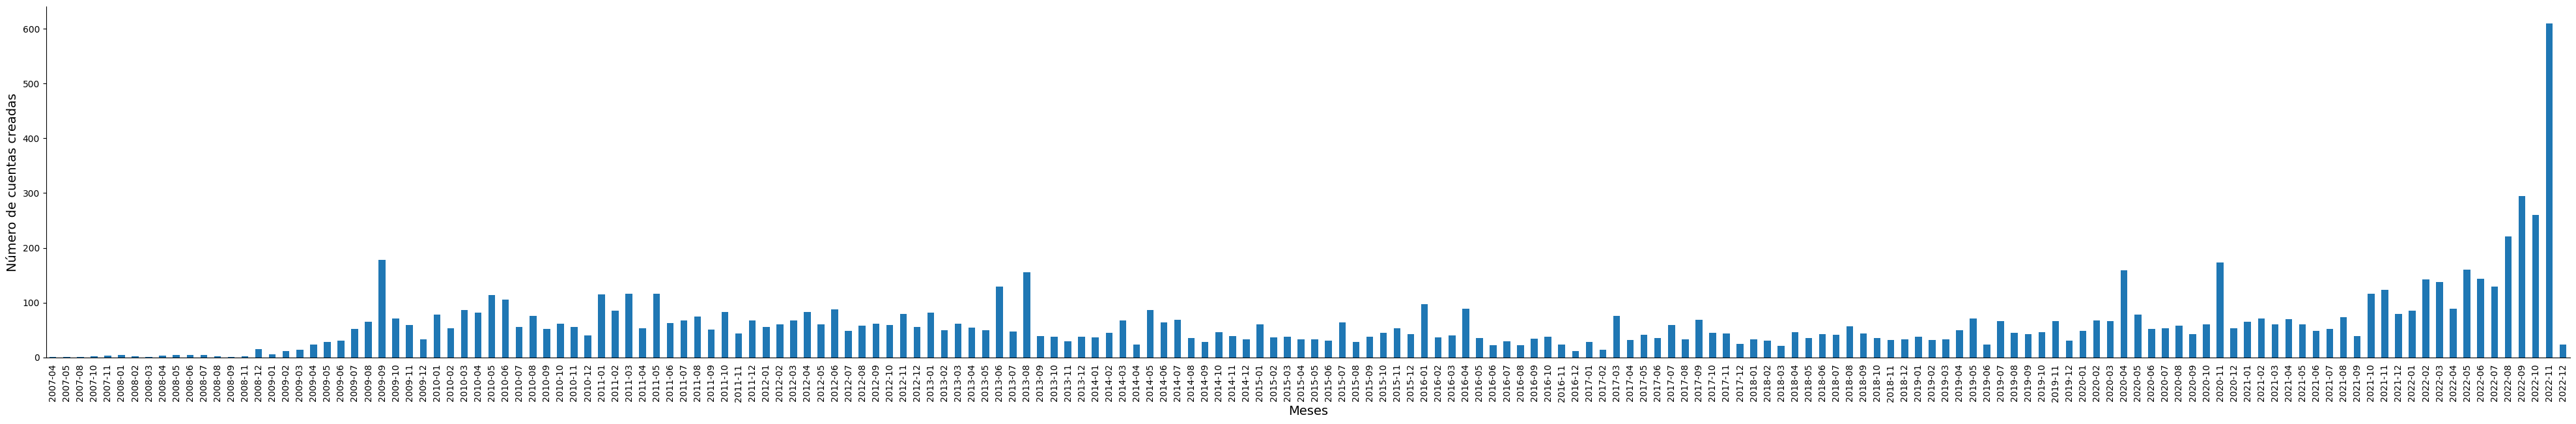

In [20]:
ax = created_by_days.plot.bar(x='month', stacked=False,figsize=(50,7),legend=None)
ax.spines[['top','right']].set_visible(False)
# plt.text(-0.4,1520,'Cronología completa',fontsize=24)
# plt.text(-0.4,1440,'Número de tweets por hora.',fontsize=14)
plt.xlabel('Meses',fontsize=14)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=True)
plt.ylabel('Número de cuentas creadas',fontsize=14)
plt.savefig('1.creacion_cuentas_megaconcat_completo.jpg',bbox_inches='tight',dpi=50)

### 8 digits accounts quantity

In [21]:
unique_authors = ht['author'].drop_duplicates()
unique_authors.apply(lambda x:bool(re.search("[0-9]{8}",x))).value_counts()

False    6609
True      674
Name: author, dtype: int64

In [22]:
ht_matriculas = ht[ht['author'].apply(lambda x:bool(re.search("[0-9]{8}",x)))].drop_duplicates(subset='author')

In [23]:
ht_matriculas

,id tweet,date,text,lang,app,author,id author,name,description,location,created at,author url,description urls,profile image url,followers,following,tweets,relation,user retweeted,tweet hashtags,tweet urls,media keys,id tweet retweeted,media types,media urls,retrieved at,date_calc
5,1598726176091930625,2022-12-02 17:09:57,RT @JhosepTaipan: #2Dic|🇻🇪 #FelizViernes 🎄💫 🏷 #ExpoPortuguesa2022 @MamJosefina1 @luis16684716 @AveFenixBella @Vencedora_7 @stharlyng_r @torreseudomar3 @patriotavzlan @chande5035 @kristof8419 @jose_atencambat @LeyvaThaisRuiz @VicmarVikivjam @Dheivy8 https://t.co/jXVDfHVwBO,und,Twitter for Android,victor11123492,1592223244970606598,victor,NaN,None,2022-11-14 18:29:49,None,None,https://pbs.twimg.com/profile_images/1592223504258195456/IY1beAqe_normal.jpg,72,60,1847,retweeted,JhosepTaipan,"['2Dic', 'FelizViernes', 'ExpoPortuguesa2022']",['https://twitter.com/JhosepTaipan/status/1598707728037597184/photo/1'],['3_1598707725558579201'],1.598708e+18,['photo'],['https://pbs.twimg.com/media/Fi_ANMGXgAEeohD.jpg'],2022-12-02 17:10:27,2022-11
15,1598726099319623688,2022-12-02 17:09:39,RT @GalleryShopInfo: Historia Mínima de la Violencia en México #FelizViernes https://t.co/GQLupwL0Zb https://t.co/8sV1sz6suc,es,Twitter for Android,xihuitl73693492,1184708604,Xihuitl,NaN,México,2013-02-16 05:11:50,None,None,https://pbs.twimg.com/profile_images/463700121901756417/1K1wXYAn_normal.png,427,828,102678,retweeted,GalleryShopInfo,['FelizViernes'],"['https://amzn.to/3Y1rpUC', 'https://twitter.com/GalleryShopInfo/status/1598682049115742209/video/1']",['7_1598681758198894592'],1.598682e+18,['video'],['https://pbs.twimg.com/ext_tw_video_thumb/1598681758198894592/pu/img/GxV9mz2OJynCZ6sz.jpg'],2022-12-02 17:10:27,2013-02
23,1598725858914701319,2022-12-02 17:08:42,RT @sahorifit1: #FelizViernes #viernesdeseduccion #ViernesDeArte #Viernes #BuenosDiasMundo #CDMX #Gintonic #girlpower #Mexicans LA DISCIPLINA TE LLEVA DONDE LA MOTIVACIÓN NO ALCANZA 📲5535688771 #RT希望 #Disponible https://t.co/wDGYNZiJfr,es,Twitter for Android,JuanCoo52677942,1496672123103948805,ronal Cook,NaN,None,2022-02-24 02:23:52,None,None,https://pbs.twimg.com/profile_images/1594544514869460994/laRIP58h_normal.jpg,33,388,2782,retweeted,sahorifit1,"['FelizViernes', 'viernesdeseduccion', 'ViernesDeArte', 'Viernes', 'BuenosDiasMundo', 'CDMX', 'Gintonic', 'girlpower', 'Mexicans', 'RT希望', 'Disponible']","['https://twitter.com/sahorifit1/status/1598674797227122689/photo/1', 'https://twitter.com/sahorifit1/status/1598674797227122689/photo/1', 'https://twitter.com/sahorifit1/status/1598674797227122689/photo/1']","['3_1598674776809152514', '3_1598674782945529858', '3_1598674790629400577']",1.598675e+18,"['photo', 'photo', 'photo']","['https://pbs.twimg.com/media/Fi-iPUcWIAIfx2u.jpg', 'https://pbs.twimg.com/media/Fi-iPrTX0AI42Tq.jpg', 'https://pbs.twimg.com/media/Fi-iQH7WYAEim6W.jpg']",2022-12-02 17:10:27,2022-02
31,1598725715574214657,2022-12-02 17:08:08,"RT @andreitav92: Muy buenos días!!!☀️ ☕️ ~ Suelta lo que pesa, ama lo que tienes y agradece lo que llega~ #FelizViernes https://t.co/edDHKl6Www",es,Twitter for Android,Wilsonp12731434,1568653559914184704,Wilson parker🇪🇦,Binary Trader profesional / marketing de afiliados / lo ayuda a crecer financieramente,"Barcelona, Spain",2022-09-10 17:32:17,None,None,https://pbs.twimg.com/profile_images/1577232004432773122/NWUVU5Xm_normal.jpg,311,1397,1765,retweeted,andreitav92,['FelizViernes'],['https://twitter.com/andreitav92/status/1598688083469369344/photo/1'],['3_1598688062757916674'],1.598688e+18,['photo'],['https://pbs.twimg.com/media/Fi-uUqdX0AITlGv.jpg'],2022-12-02 17:10:27,2022-09
34,1598725697047928832,2022-12-02 17:08:03,"RT @monyruva_72: @ClubMhoniFan @mhonividente Buenos días Club, Mhoni bella! Deseando que tengan un maravilloso fin de semana llena de milchorromil 😘! #FelizViernes #ViernesdeMhoni https://t.co/fOjbcNSFpp",es,Twitter for Android,America34419555,1462592237372686346,América.,NaN,None,2021-11-22 01:22:38,None,None,https://

In [24]:
matriculas_created_by_days = ht_matriculas['date_calc'].value_counts()

In [25]:
matriculas_created_by_days = matriculas_created_by_days.reset_index().rename(columns={'index':'month','date_calc':'count'}).sort_values(by='month')

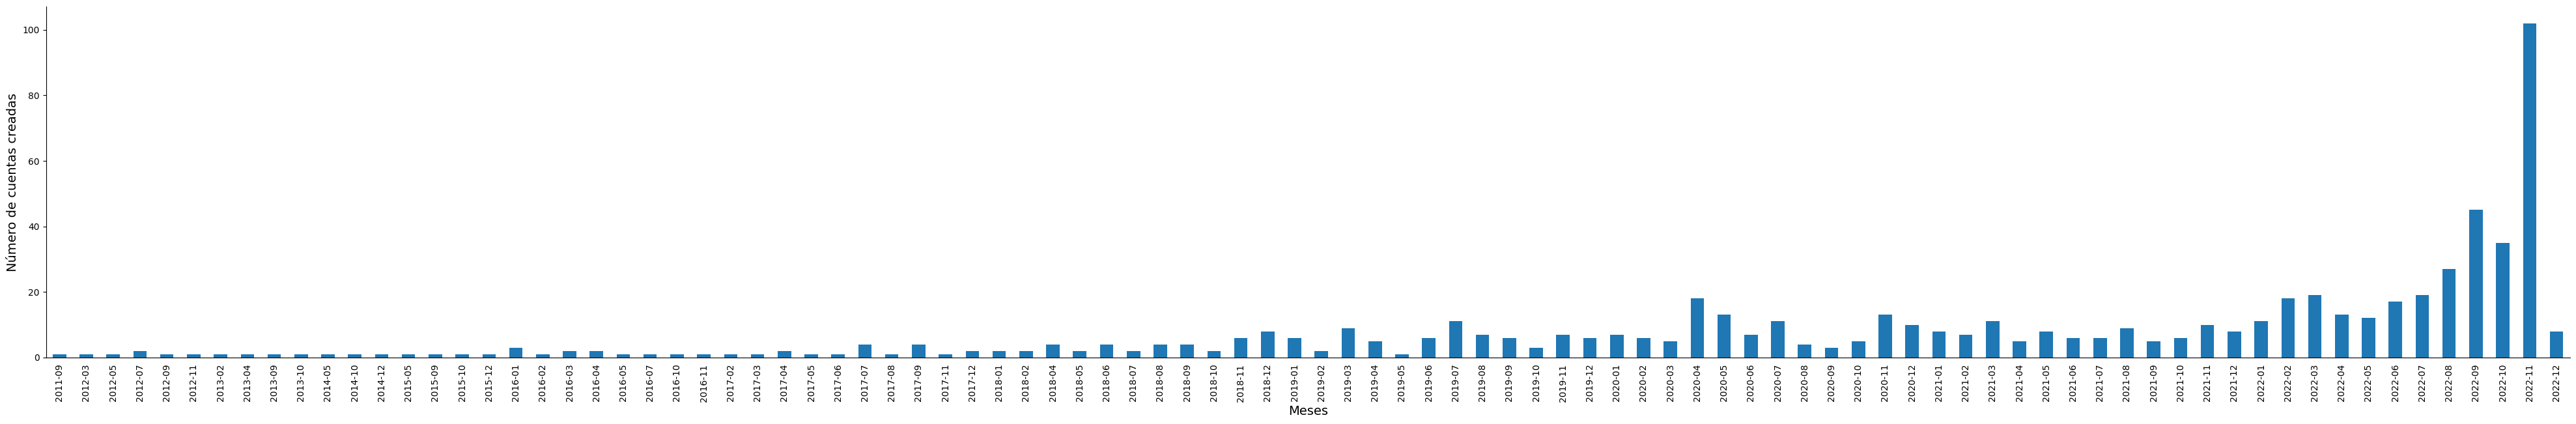

In [26]:
ax = matriculas_created_by_days.plot.bar(x='month', stacked=False,figsize=(50,7),legend=None)
ax.spines[['top','right']].set_visible(False)
# plt.text(-0.4,1520,'Cronología completa',fontsize=24)
# plt.text(-0.4,1440,'Número de tweets por hora.',fontsize=14)
plt.xlabel('Meses',fontsize=14)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=True)
plt.ylabel('Número de cuentas creadas',fontsize=14)
plt.savefig('1.creacion_cuentas_megaconcat_matricula.jpg',bbox_inches='tight',dpi=50)